In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model, to_categorical
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# extracting training and testing datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# converting datatype and normalize training and testing data
X_train, X_test = X_train.astype('float32')/X_train.max(), X_test.astype('float32')/X_test.max()

# one-hot vector representation of target level
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# split train and validation data
X_train, X_valid = X_train[10000:], X_train[:10000]
y_train, y_valid = y_train[10000:], y_train[:10000]

In [3]:
model = tf.keras.Sequential()  # instantiate a sequential model

# adding different layers to a model
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #Flattens the input. Does not affect the batch size.
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.45))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


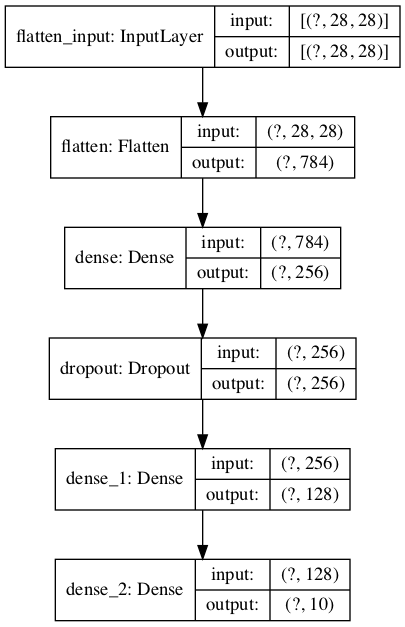

In [5]:
# visulizing the model just created
plot_model(model, to_file='model_plot.png', show_shapes=True,
                      show_layer_names=True)

In [6]:
#optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01, rho=0.95, epsilon=1e-07, name='Adadelta')
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005, rho=0.85, momentum=0.01,
                                        epsilon=1e-07, centered=False, name='RMSprop')
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0,
                                               name='categorical_crossentropy')

# configure the model for training using comiple() method
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [7]:
# A History object. Its History.history attribute is a record
# of training loss values and metrics values at successive epochs
# as well as validation loss values and validation metrics values
# (if applicable).
epochs = 30
batch_size = 128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 88us/sample - loss: 1.6212 - accuracy: 0.8412 - val_loss: 1.5386 - val_accuracy: 0.9232
Epoch 2/30
50000/50000 [==============================] - 4s 77us/sample - loss: 1.5539 - accuracy: 0.9070 - val_loss: 1.5236 - val_accuracy: 0.9366
Epoch 3/30
50000/50000 [==============================] - 4s 80us/sample - loss: 1.5470 - accuracy: 0.9138 - val_loss: 1.5251 - val_accuracy: 0.9357
Epoch 4/30
50000/50000 [==============================] - 4s 79us/sample - loss: 1.5386 - accuracy: 0.9220 - val_loss: 1.5140 - val_accuracy: 0.9470
Epoch 5/30
50000/50000 [==============================] - 4s 78us/sample - loss: 1.5333 - accuracy: 0.9276 - val_loss: 1.5149 - val_accuracy: 0.9459
Epoch 6/30
50000/50000 [==============================] - 4s 78us/sample - loss: 1.5318 - accuracy: 0.9290 - val_loss: 1.5068 - val_accuracy: 0.9543
Epoch 7/30
50000/50000 [==============================] 

In [8]:
train_loss, train_accuracy = history.history['loss'], history.history['accuracy']
val_loss, val_accuracy = history.history['val_loss'], history.history['val_accuracy']

In [9]:
type(train_loss)

list

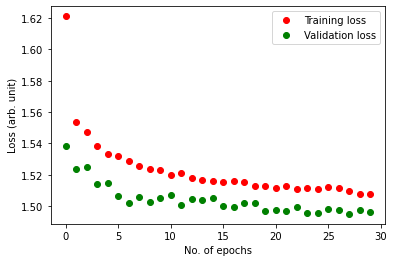

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(train_loss, 'ro', label='Training loss')
plt.plot(val_loss,'go', label='Validation loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss (arb. unit)')
plt.legend()
plt.show()

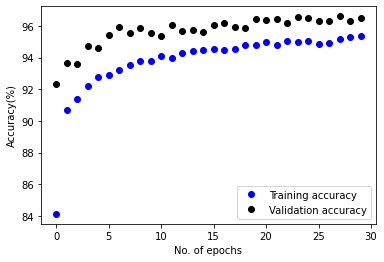

In [11]:
plt.plot(range(epochs), np.asarray(train_accuracy)*100, 'bo', label='Training accuracy')
plt.plot(range(epochs), np.asarray(val_accuracy)*100, 'ko', label='Validation accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy(%)')
plt.legend()

In [12]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test, batch_size=128, verbose=0, sample_weight=None, steps=None,
                              callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

In [13]:
print('Test loss: ', test_loss, ',',  'Test accuracy: ', test_accuracy)

Test loss:  1.4950386810302734 , Test accuracy:  0.9663


In [14]:
prediction = model.predict(X_test)

In [15]:
prediction[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

The first digit in the training dataset is:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


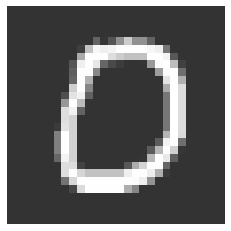

In [16]:
print('The first digit in the training dataset is: ', y_test[10])

# plotting first digit in the training dataset
plt.imshow(X_test[10], cmap='gray', alpha=0.8)
plt.axis('off')
plt.show()